1. 활성화 함수의 비교

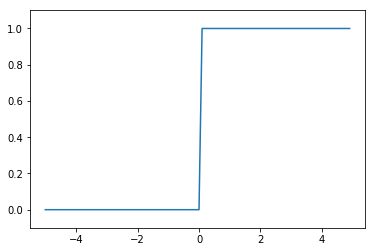

In [6]:
#계단형 함수
def step_function_old(x):
    if x > 0:
        return 1
    else:
        return 0
    
#넘파이 배열 지원 계단형 함수(넘파이 트릭 활용 함수)
import numpy as np
import matplotlib.pylab as plt
def step_function_1st(x):
    y = x > 0 #넘파이 부등호 연산을 수행하면, 원소 각각의 비교 결과(True/False) bool배열을 반환
    return y.astype(np.int) #배열의 자료형을 np.int로 변경(True=>1, False=>0)

#계단함수 그래프 확인
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) #-5.0 에서 5.0 전 까지의 0.1간격의 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show() #0을 경계로 출력이 0<->1로 변경 됨

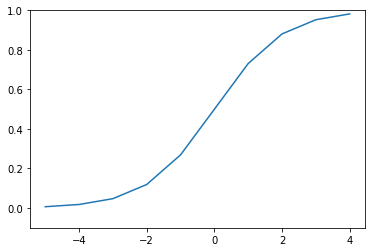

In [18]:
#시그모이드 함수
def sigmoid(x): #시그모이드란 'S자 모양'이라는 뜻. 계단형 함수처럼 생긴 모양에서 유래.
    return 1 / (1 + np.exp(-x)) #exp = 2.7182...의 실수값을 갖는 자연상수

x = np.arange(-5.0, 5.0, 1.0)
y = sigmoid(x) #넘파이 브로드캐스트 기능에 의해 각 원소 모두 연산처리가 진행된다.
plt.plot(x, y)
plt.ylim(-0.1, 1,1)
plt.show()

#퍼셉트론에서는 뉴런 사이에 0 또는 1이 흐른다면, 신경망에서는 연속적인 실수가 흐른다.
#공통점: 입력값의 중요도에 따른 출력값 변화. 출력은 0과 1 사이. 비선형 함수.
#선형 함수는 합성(은닉층)의 이점을 살릴 수 없다. 다층 구조의 이점을 활용하려면 활성화 함수는 반드시 비선형.

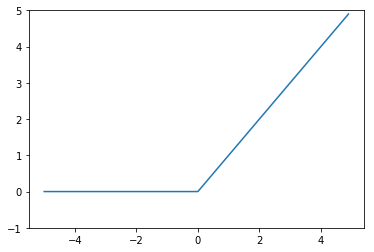

In [21]:
#ReLU(Rectified Linear Unit) 함수
#최근 주로 이용되는 함수. 0이 넘으면 입력값 그대로 출력, 0 이하면 0을 출력.
#Rectified(정류된)에서 유래. 0 이하의 값을 차단한다는 의미.
def relu(x):
    return np.maximum(0, x) #maximum은 두 입력 중 큰 값을 선택하여 반환하는 함수

x = np.arange(-5.0, 5.0, 0.1) #-5.0 에서 5.0 전 까지의 0.1간격의 넘파이 배열 생성
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 5)
plt.show() #0을 경계로 출력이 0<->1로 변경 됨

2. 다차원 배열의 계산

In [25]:
#다차원 배열
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
print(np.ndim(A)) #배열의 차원 수. 2차원 배열은 행열이라고 부름.
print(A.shape) #배열의 형상(튜플로 반환됨에 유의)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [27]:
#행렬의 내적(행렬 곱)
#교환법칙 미성립에 유의!
X = np.array([1, 2]) #1X2
W = np.array([[1, 3, 5], [2, 4, 6]]) #2X3
Y = np.dot(X, W) #1X3
print(Y)

[ 5 11 17]


3. 3층 신경망 구현

In [29]:
#입력 ->1층
X = np.array([1.0, 0.5]) #입력 신호
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #가중치
B1 = np.array([0.1, 0.2, 0.3]) #편향
A1 = np.dot(X, W1) + B1 # A1 뉴런의 가중치 합(가중 신호와 편향의 총 합) a
Z1 = sigmoid(A1) # A1 뉴런의 활성함수(h)로 시그모이드 함수를 사용, 변환된 신호 z
#1층 -> 2층
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
#2층 -> 출력(활성화 함수만 다름. 출력단의 활성화함수는 문제의 성질에 따라 다르게 정함)
def identity_function(x): #항등함수(회기), 시그모이드(이진분류), 소프트맥스(다중 클래스 분류)
    return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


3-2 3층 신경망 구현 정리

In [33]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
